## Умова лабораторної роботи

### Модель класифікації

Побудувати моделi класифiкацiї на основi методу дерев рiшень, використовуючи  `sklearn.neural_network.MLPClassifier`з рiзними значеннями гiперпараметрiв.

### Початкові дані

Див. lab2.

### Завдання

Див. lab2.


## Метрики якості

Див lab2.

## `MLPClassifier`

Multi-layer Perceptron - контрольований алгоритм навчання, який вивчає функцію $f:R^m\rightarrow R^o$ навчаючись на наборі даних, де кількість вимірів для введення та це кількість вимірів для виведення. Дано набір ознак $X=x_1,\ldots,x_m$ і цільову змінну $y$, він може вивчати апроксиматор нелінійної функції для класифікаці. Відрізняється від логістичної регресії тим, що між вхідним і вихідним шарами може бути один або кілька нелінійних шарів, які називаються прихованими шарами. На малюнку нижче показано MLP одного прихованого шару зі скалярним виходом.

![image](img/Screen%202025-01-19%20123102.jpg)

Вхідний шар складається з набору нейронів $\{x_i|x_1,\ldots,x_m\}$ що представляє вхідні функції. Кожен нейрон у прихованому шарі перетворює значення з попереднього шару за допомогою зваженого лінійного підсумовування $\sum\limits_{i=1}^m\omega_i x_i$ а потім обраховується нелінійна функція активації $g(\cdot):R\rightarrow R$

MLP навчається на двох масивах: масиві X розміру (n_samples, n_features), який містить навчальні вибірки, представлені як вектори ознак з плаваючою комою; і масив y розміром (n_samples,), який містить цільові значення (мітки класів) для навчальних зразків.

MLP навчається за допомогою стохастичного градієнтного спуску , Адама або L-BFGS. Стохастичний градієнтний спад (SGD) оновлює параметри, використовуючи градієнт функції втрат щодо параметра, який потребує адаптації, тобто:
$$\omega\leftarrow\omega - \eta(\alpha\dfrac{\partial R(\omega)}{\partial \omega}+\dfrac{\partial Loss}{\partial \omega})$$

Adam схожий на SGD у тому сенсі, що він є стохастичним оптимізатором, але він може автоматично регулювати кількість для оновлення параметрів на основі адаптивних оцінок моментів нижчого порядку.

L-BFGS — це розв’язувач, який апроксимує матрицю Гессе, яка представляє часткову похідну функції другого порядку. Крім того, він апроксимує зворотну матрицю Гессе для виконання оновлення параметрів.
 
Функції активації:

1. Tanh (Гіперболічний тангенс):
Функція активації tanh відображає вхід у діапазон від $-1$ до $1$.

Формула:
$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

Похідна (для backpropagation):
$$
f'(x) = 1 - \tanh^2(x)
$$



2. Logistic (Сигмоїда):
Функція logistic (або сигмоїда) відображає вхід у діапазон від $0$ до $1$.

Формула:
$$
f(x) = \sigma(x) = \frac{1}{1 + e^{-x}}
$$

Похідна (для backpropagation):
$$
f'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$



3. ReLU (Rectified Linear Unit):
Функція ReLU відображає вхід як максимум між $0$ і самим значенням, тобто всі від’ємні значення обнуляються.

Формула:
$$
f(x) = \max(0, x)
$$

Похідна (для backpropagation):
$$
f'(x) =
\begin{cases} 
1, & \text{якщо } x > 0 \\
0, & \text{якщо } x \leq 0
\end{cases}
$$



Порівняння функцій активацій:
- Tanh: Використовується для вхідних даних, центрованих навколо $0$, що може сприяти швидшому навчанню. Підходить для регресії та класифікації, але може викликати проблему зникання градієнта на великих або малих значеннях.
- Logistic: Добре працює для класифікаційних задач із бінарними виходами, але має ті ж проблеми зі зниканням градієнта.
- ReLU: Найбільш популярна функція активації для глибоких мереж через ефективність та простоту. Може викликати проблему "мертвих нейронів" (dead neurons), якщо ваги стають такими, що $x \leq 0$.

Рекомендації щодо практичного використання MLP:
* Багатошаровий Perceptron чутливий до масштабування функцій, тому настійно рекомендується масштабувати дані $X$. Наприклад, до [0, 1] або [-1, +1] або стандартизуйте його, щоб мати середнє значення 0 і дисперсію 1.
* LBFGS збігається швидше та з кращими рішеннями на невеликих наборах даних. Однак для відносно великих наборів даних Adam дуже надійний. Зазвичай він швидко сходиться і дає досить хорошу продуктивність. SGD з імпульсом або імпульсом Нестерова, з іншого боку, може працювати краще, ніж ці два алгоритми, якщо швидкість навчання налаштована правильно.

##  Імпорт потрібних бібліотек та функцій

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
  precision_recall_fscore_support,
  RocCurveDisplay,
  PrecisionRecallDisplay,
  confusion_matrix
)


## `MLPClassifier` для набору (a)

### EDA malicious and benign websites & Split Data

Див. lab2.

In [2]:
train_data1 = pd.read_csv("../lab2/data/malisicious_and_benign_websites/train.csv")
test_data1 = pd.read_csv("../lab2/data/malisicious_and_benign_websites/test.csv")

### Пошук найкращих параметрів `MLPClassifier`

Подивимось опис даних.

In [3]:
train_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
URL_LENGTH,140.0,70.971429,42.180486,21.0,39.00,53.0,90.75,198.0
NUMBER_SPECIAL_CHARACTERS,140.0,13.650000,6.731142,6.0,9.00,11.0,17.00,36.0
CHARSET,140.0,1.421429,1.383707,0.0,0.00,1.0,2.00,5.0
SERVER,140.0,68.178571,61.302208,0.0,6.00,78.5,110.00,175.0
WHOIS_COUNTRY,140.0,26.171429,12.293148,2.0,11.00,35.0,35.00,39.0
WHOIS_STATEPRO,140.0,65.828571,51.277345,6.0,19.75,48.5,109.25,173.0
TCP_CONVERSATION_EXCHANGE,140.0,18.900000,101.095531,0.0,0.00,3.5,18.00,1194.0
DIST_REMOTE_TCP_PORT,140.0,2.107143,5.288370,0.0,0.00,0.0,1.00,32.0
REMOTE_IPS,140.0,2.192857,2.881088,0.0,0.00,1.0,3.00,14.0
APP_BYTES,140.0,1854.585714,8495.209522,0.0,0.00,285.0,2072.00,99843.0


Дані розкидані на дуже великі проміжки. Тому, потрібно зробити пайплайн, для коректного масштабування даних перед подачею до моделі, за допомогою `estimator=make_pipeline(MinMaxScaler(), MLPClassifier())`.

`grid_search_1` шукає найкращі параметри `MLPClassifier` на даних `train_data1`.

In [4]:
grid_search_1 = GridSearchCV(
  estimator=make_pipeline(MinMaxScaler(), MLPClassifier()),
  param_grid={
      "mlpclassifier__solver": ["adam","lbfgs"],
      "mlpclassifier__activation": ["relu"],
      "mlpclassifier__hidden_layer_sizes": [(48,),(64,)],
      "mlpclassifier__learning_rate": ["adaptive", "constant"],
      "mlpclassifier__learning_rate_init": [0.05,0.01],
      "mlpclassifier__max_iter": [1500],
      "mlpclassifier__tol": [1e-3],
      "mlpclassifier__early_stopping": [True],
    },
  scoring=[ "f1"],
  refit="f1",
  cv=3,
  verbose=1,
  error_score='raise'
)

Виконаємо пошук параметрів `grid_search_1`.

In [5]:
%%time
_ = grid_search_1.fit(
  train_data1.drop(columns=["Type"]),
  train_data1["Type"]
)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
CPU times: total: 6.08 s
Wall time: 3.75 s


Параметри `grid_search_1.best_estimator_`.

In [6]:
print(grid_search_1.best_params_)
print("f1:",grid_search_1.best_score_)

{'mlpclassifier__activation': 'relu', 'mlpclassifier__early_stopping': True, 'mlpclassifier__hidden_layer_sizes': (64,), 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__learning_rate_init': 0.01, 'mlpclassifier__max_iter': 1500, 'mlpclassifier__solver': 'lbfgs', 'mlpclassifier__tol': 0.001}
f1: 0.8551559888945907


### Метрики якості `grid_search_1.best_estimator_`

Визначимо прогнози моделі `grid_search_1.best_estimator_` на тестовій вибірці `test_data1`.

In [7]:
y_pred_1 = grid_search_1\
  .best_estimator_\
    .predict(
      test_data1.drop(columns=["Type"]
    )
  )

Метрики якості на спрогнозованих значеннях:

In [8]:
precision, recall, f1, _ = precision_recall_fscore_support(
  test_data1["Type"],
  y_pred_1,
  average="binary"
)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Confusion matrix:\n{confusion_matrix(test_data1["Type"],y_pred_1)}")

Precision: 0.9069767441860465
Recall: 0.8297872340425532
F1: 0.8666666666666667
Confusion matrix:
[[43  4]
 [ 8 39]]


Відображемо ROC криву та AUC, Precision-Recall криву та Average Precision `grid_search_1.best_estimator_`:

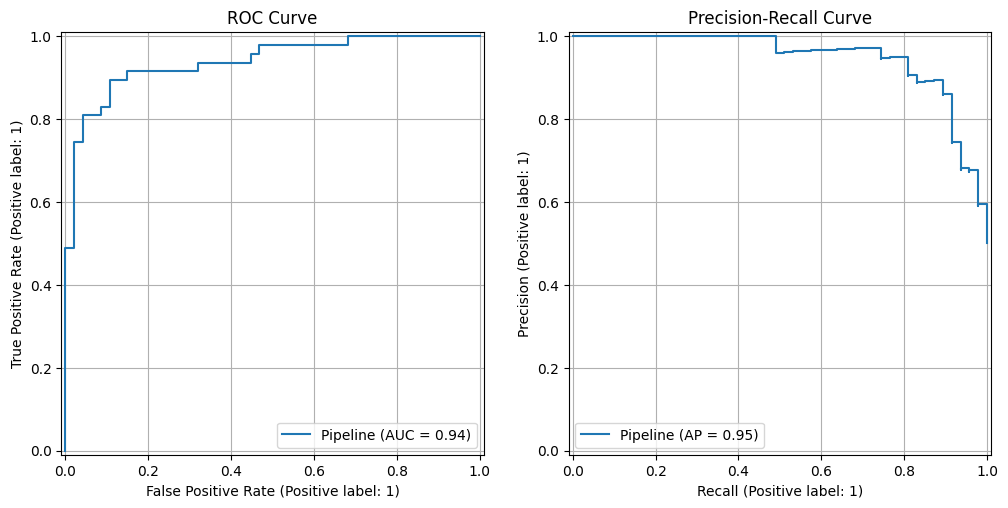

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(
    grid_search_1.best_estimator_,
    test_data1.drop(columns=["Type"]),
    test_data1["Type"],
    ax=axes[0]
)
axes[0].set_title("ROC Curve")
axes[0].grid(True)


PrecisionRecallDisplay.from_estimator(
    grid_search_1.best_estimator_,
    test_data1.drop(columns=["Type"]),
    test_data1["Type"],
    ax=axes[1] 
)
axes[1].set_title("Precision-Recall Curve")
axes[1].grid(True)

## `MLPClassifier` для набору (b)

### EDA logical_xor websites & Split Data

Див. lab2.

In [10]:
train_data2 = pd.read_csv("../lab2/data/logical_xor/train.csv")
test_data2 = pd.read_csv("../lab2/data/logical_xor/test.csv")

### Пошук найкращих параметрів `MLPClassifier`

`grid_search_2` шукає найкращі параметри `MLPClassifier` на даних `data2`.

In [11]:
grid_search_2 = GridSearchCV(
  estimator=MLPClassifier(),
  param_grid={
    "solver": ["lbfgs", "adam"],
    "activation": ["tanh","logistic"],
    "hidden_layer_sizes":  [(8,),(12,),(16,),],
    "learning_rate": ["invscaling", "adaptive"],
    "alpha":[0.1],
    "early_stopping": [True],
    "tol": [1e-3]
    },
  scoring=["f1"],
  refit="f1",
  cv=3,
  verbose=1,
  error_score='raise'
)

Виконаємо пошук параметрів `grid_search_2`.

In [12]:
%%time
_ = grid_search_2.fit(
  train_data2[["X1", "X2"]],
  train_data2["Y"]
)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


CPU times: total: 3.91 s
Wall time: 5.69 s


Параметри `grid_search_2.best_estimator_`.

In [13]:
print(grid_search_2.best_params_)
print("f1:",grid_search_2.best_score_)

{'activation': 'tanh', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': (8,), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'tol': 0.001}
f1: 0.9713405238828968


### Метрики якості `grid_search_2.best_estimator_`

Визначимо прогнози моделі `grid_search_2.best_estimator_` на тестовій вибірці `test_data2`:

In [14]:
y_pred_2 = grid_search_2\
  .best_estimator_\
    .predict(
        test_data2[["X1", "X2"]]
    )

Метрики якості на спрогнозованих значеннях:

In [15]:
precision, recall, f1, _ = precision_recall_fscore_support(
  test_data2["Y"],
  y_pred_2,
  average='binary' 
)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Confusion matrix:\n{confusion_matrix(test_data2["Y"],y_pred_2)}")

Precision: 0.95
Recall: 1.0
F1: 0.9743589743589743
Confusion matrix:
[[60  3]
 [ 0 57]]


Відображемо ROC криву та AUC, Precision-Recall криву та Average Precision, границі рішень `grid_search_2.best_estimator_`:

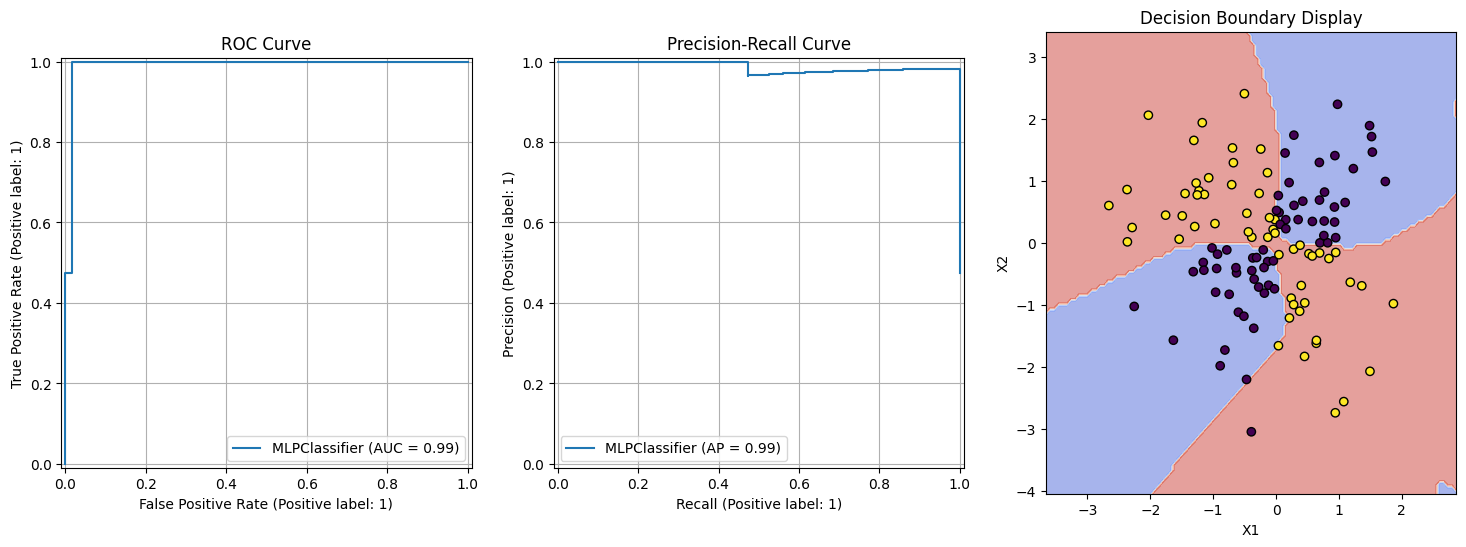

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

RocCurveDisplay.from_estimator(
    grid_search_2.best_estimator_,
    test_data2[["X1", "X2"]],
    test_data2["Y"],
    ax=axes[0]
)
axes[0].set_title("ROC Curve")
axes[0].grid(True)

PrecisionRecallDisplay.from_estimator(
    grid_search_2.best_estimator_,
    test_data2[["X1", "X2"]],
    test_data2["Y"],
    ax=axes[1]
)
axes[1].set_title("Precision-Recall Curve")
axes[1].grid(True)


disp = DecisionBoundaryDisplay.from_estimator(
    grid_search_2.best_estimator_,
    test_data2[["X1", "X2"]],
    response_method="predict",
    xlabel="X1",
    ylabel="X2",
    alpha=0.5,
    cmap="coolwarm",
    ax=axes[2]
)
axes[2].set_title("Decision Boundary Display")


disp.ax_.scatter(test_data2["X1"], test_data2["X2"], c=test_data2["Y"], edgecolor="k")

## Висновки

Для обох наборів даних було побудовано моделі для оптимізації гіперпараметрів `MLPClassifier`.

Таблиця порівнянь метрик якості моделей, натренованих на `dataset_Malicious_and_Bening_Websites` (значення приблизні):

|                        | Precision | Recall | F1   | AP   | AUC  |
|------------------------|-----------|--------|------|------|------|
| DecisionTreeClassifier | 0.94      | 0.96   | 0.95 | 0.95 | 0.97 |
| MLPClassifier          | 0.93      | 0.87   | 0.90 | 0.94 | 0.95 |

Таблиця порівнянь метрик якості моделей, натренованих на `logical_XOR`(значення приблизні):

|                  | Precision | Recall | F1   | AP   | AUC  |
|------------------------|-----------|--------|------|------|------|
| DecisionTreeClassifier | 0.96      | 0.93   | 0.95 | 0.97 | 0.97 |
| MLPClassifier          | 0.95      | 1      | 0.97 | 0.99 | 0.99 |

Бачимо, що для набору `dataset_Malicious_and_Bening_Websites` показники дещо погіршилися, проте, це пов'язано з наявністю багатьох ознак у наборі. `DecisionTreeClassifier` вибирає лише декілька ознак для булевої логіки, а `MLPClassifier ` використовує усі ознаки.
Для `logical_XOR` показники дещо поліпшилися. А також графік границь рішень виглядає краще, у порівнянні з lab2.
